In [1]:
# Cell 1: Import libraries
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import numpy as np

In [15]:
# Load Match Data (World Cup 2018)
matches = sb.matches(competition_id=43, season_id=3)
print(matches[['match_id', 'home_team', 'away_team']])

    match_id     home_team    away_team
0       7585      Colombia      England
1       7570       England      Belgium
2       7586        Sweden  Switzerland
3       7557          Iran     Portugal
4       7542      Portugal      Morocco
..       ...           ...          ...
59      7540        Russia        Egypt
60      8652        Russia      Croatia
61      7563       Denmark       France
62      7556         Japan      Senegal
63      7559  Saudi Arabia        Egypt

[64 rows x 3 columns]


In [22]:
match_id = matches[(matches['home_team'] == 'France') & (matches['away_team'] == 'Argentina')]['match_id'].values[0]
match_date = matches[(matches['home_team'] == 'France') & (matches['away_team'] == 'Argentina')]['match_date'].values[0]
print(match_id, match_date)

7580 2018-06-30


In [6]:
# Load Event Data
events = sb.events(match_id=match_id)

In [7]:
# Calculate PPDA -passes allowed per defensive action
france_pressures = events[(events['type'] == 'Pressure') & (events['team'] == 'France')]
argentina_passes = events[(events['type'] == 'Pass') & (events['team'] == 'Argentina')]
france_def_actions = events[(events['team'] == 'France') & 
                            (events['type'].isin(['Pressure', 'Duel', 'Interception', 'Tackle']))]

ppda = len(argentina_passes) / len(france_def_actions)

In [8]:
print(f"PPDA (France): {ppda:.2f}")

PPDA (France): 1.67


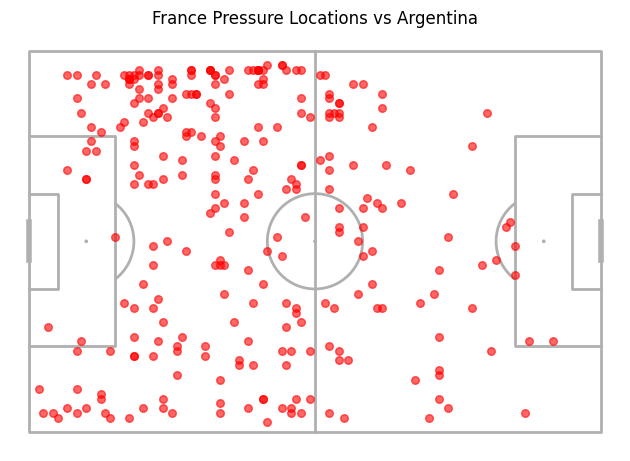

In [10]:
# Pressure Map
pitch = Pitch()
fig, ax = pitch.draw()
x = france_pressures['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
y = france_pressures['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)
pitch.scatter(x, y, ax=ax, s=30, color='red', alpha=0.6)
ax.set_title('France Pressure Locations vs Argentina')
plt.show()

C:\Users\anantgar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mplsoccer\_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


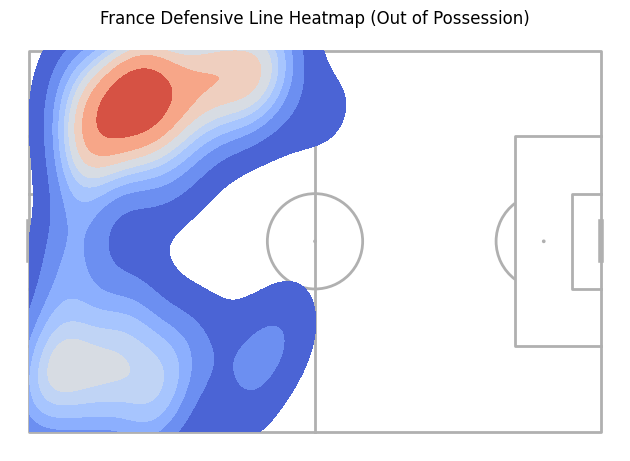

In [11]:
# Defensive Heatmap (Defenders Out of Possession)
defenders = ['Centre Back', 'Right Back', 'Left Back']
out_def = events[
    (events['team'] == 'France') &
    (events['possession_team'] != 'France') &
    (events['position'].isin(defenders))
]

x = out_def['location'].apply(lambda loc: loc[0] if isinstance(loc, list) else None)
y = out_def['location'].apply(lambda loc: loc[1] if isinstance(loc, list) else None)

fig, ax = pitch.draw()
pitch.kdeplot(x, y, ax=ax, shade=True, cmap='coolwarm', bw_adjust=0.7)
ax.set_title('France Defensive Line Heatmap (Out of Possession)')
plt.show()